# External modules

In [3]:
library(tidyverse)
library(readr)
library(DescTools)

# Internal functions

In [11]:
path <- ".."

xfun::in_dir(dir = path, expr = source("./src/impute_outliers.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_nlargest_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima.R"))
xfun::in_dir(dir = path, expr = source("./src/extract_block_maxima_with_indexes.R"))

xfun::in_dir(dir = path, expr = source("./src/get_standard_scaled_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_data.R"))
xfun::in_dir(dir = path, expr = source("./src/get_one_hot_encoded_and_standard_scaled_data.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_modes.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_modes.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_gev_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_ns_gev_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_single_ns_gev_model.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_gev_models.R"))

xfun::in_dir(dir = path, expr = source("./src/get_ns_gev_model_normalized_parameters.R"))
xfun::in_dir(dir = path, expr = source("./src/get_several_ns_gev_model_normalized_parameters.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_several_standardized_block_maxima_mean.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_several_ns_standardized_block_maxima_mean.R"))

xfun::in_dir(dir = path, expr = source("./src/fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_fit_stationary_gev_mixture_model.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_fit_non_stationary_gev_mixture_model.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_inverse_cdf.R"))
xfun::in_dir(dir = path, expr = source("./src/calculate_non_stationary_gev_mixture_model_pdf.R"))
xfun::in_dir(dir = path, expr = source("./src/generate_non_stationary_gev_mixture_model_sample.R"))

xfun::in_dir(dir = path, expr = source("./src/estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/estimate_non_stationary_gev_mixture_model_quantile.R"))

xfun::in_dir(dir = path, expr = source("./src/plot_estimate_stationary_gev_mixture_model_quantile.R"))
xfun::in_dir(dir = path, expr = source("./src/plot_estimate_non_stationary_gev_mixture_model_quantile.R"))


In [12]:
options(repr.plot.width=19, repr.plot.height=12)

# Complete dataset

In [31]:
data <- xfun::in_dir(dir = path, expr = read.csv(file = "./06_experimentation_1/localization_errors.csv", sep = ";"))

In [32]:
str(data)

'data.frame':	22847 obs. of  4 variables:
 $ timestamp         : int  17207386 17241310 17274219 17308103 17343083 17374951 17408808 17440764 17474667 17508571 ...
 $ lateral_error     : num  -0.589 -0.571 -0.566 -0.56 -0.592 ...
 $ longitudinal_error: num  0.0639 0.0775 0.0832 0.0979 0.1043 ...
 $ haversine_error   : num  0.592 0.576 0.572 0.569 0.6 ...


# Impute outliers

In [33]:
x_raw <- abs(data$lateral_error)

In [34]:
coefficient_iqr <- 9
method <- c("interpolate", "mode", "median", "mean")[1]

In [35]:
x_raw_object <- impute_outliers(x = x_raw, coefficient_iqr = coefficient_iqr, method = method)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [36]:
print(names(x_raw_object))

[1] "outlier_values"      "outlier_positions"   "outlier_substitutes"
[4] "method"              "coefficient_iqr"     "imputed_data"       
[7] "raw_data"           


In [37]:
outlier_positions <- x_raw_object$outlier_positions

In [38]:
print(outlier_positions)

  [1]  2348  2349  2350  2351  2352  2353  2354  2355  2356  2357  2358  2359
 [13]  2360  2361  2362  2363  2364  2365  2366  2367  2368  2369  2370  2371
 [25]  2372  2373  2374  2375  2376  2377  2378  2379  2380  2381  2382  2383
 [37]  2384  2385  2386  2387  2388  2389  2390  2391  2392  2393  2394  2395
 [49]  2396  4811  4812  4813  4814  4815  4816  4817  4818  4819  4820  4821
 [61]  4822  4823  4824  4825  4826  4827  4828  4829 16605 16606 16607 16608
 [73] 16609 16610 16611 16612 16613 16614 16615 16616 16617 16618 16619 16620
 [85] 16621 16622 16623 16624 16625 16626 16627 16628 16629 16630 16631 16632
 [97] 16633 16634 16635 16636 16637 16638 16639 16640 16641 16642 16643 16644
[109] 16645 16646 16647 16648 16649 16650 16651 16652 16653 16654 16655 18392
[121] 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404
[133] 18405 18406 18407 18408 18409 18410 18411 18412 18417 18418 18419 18420
[145] 18421 18422 18423 18424 18425 18426 18427 18428 18429 1843

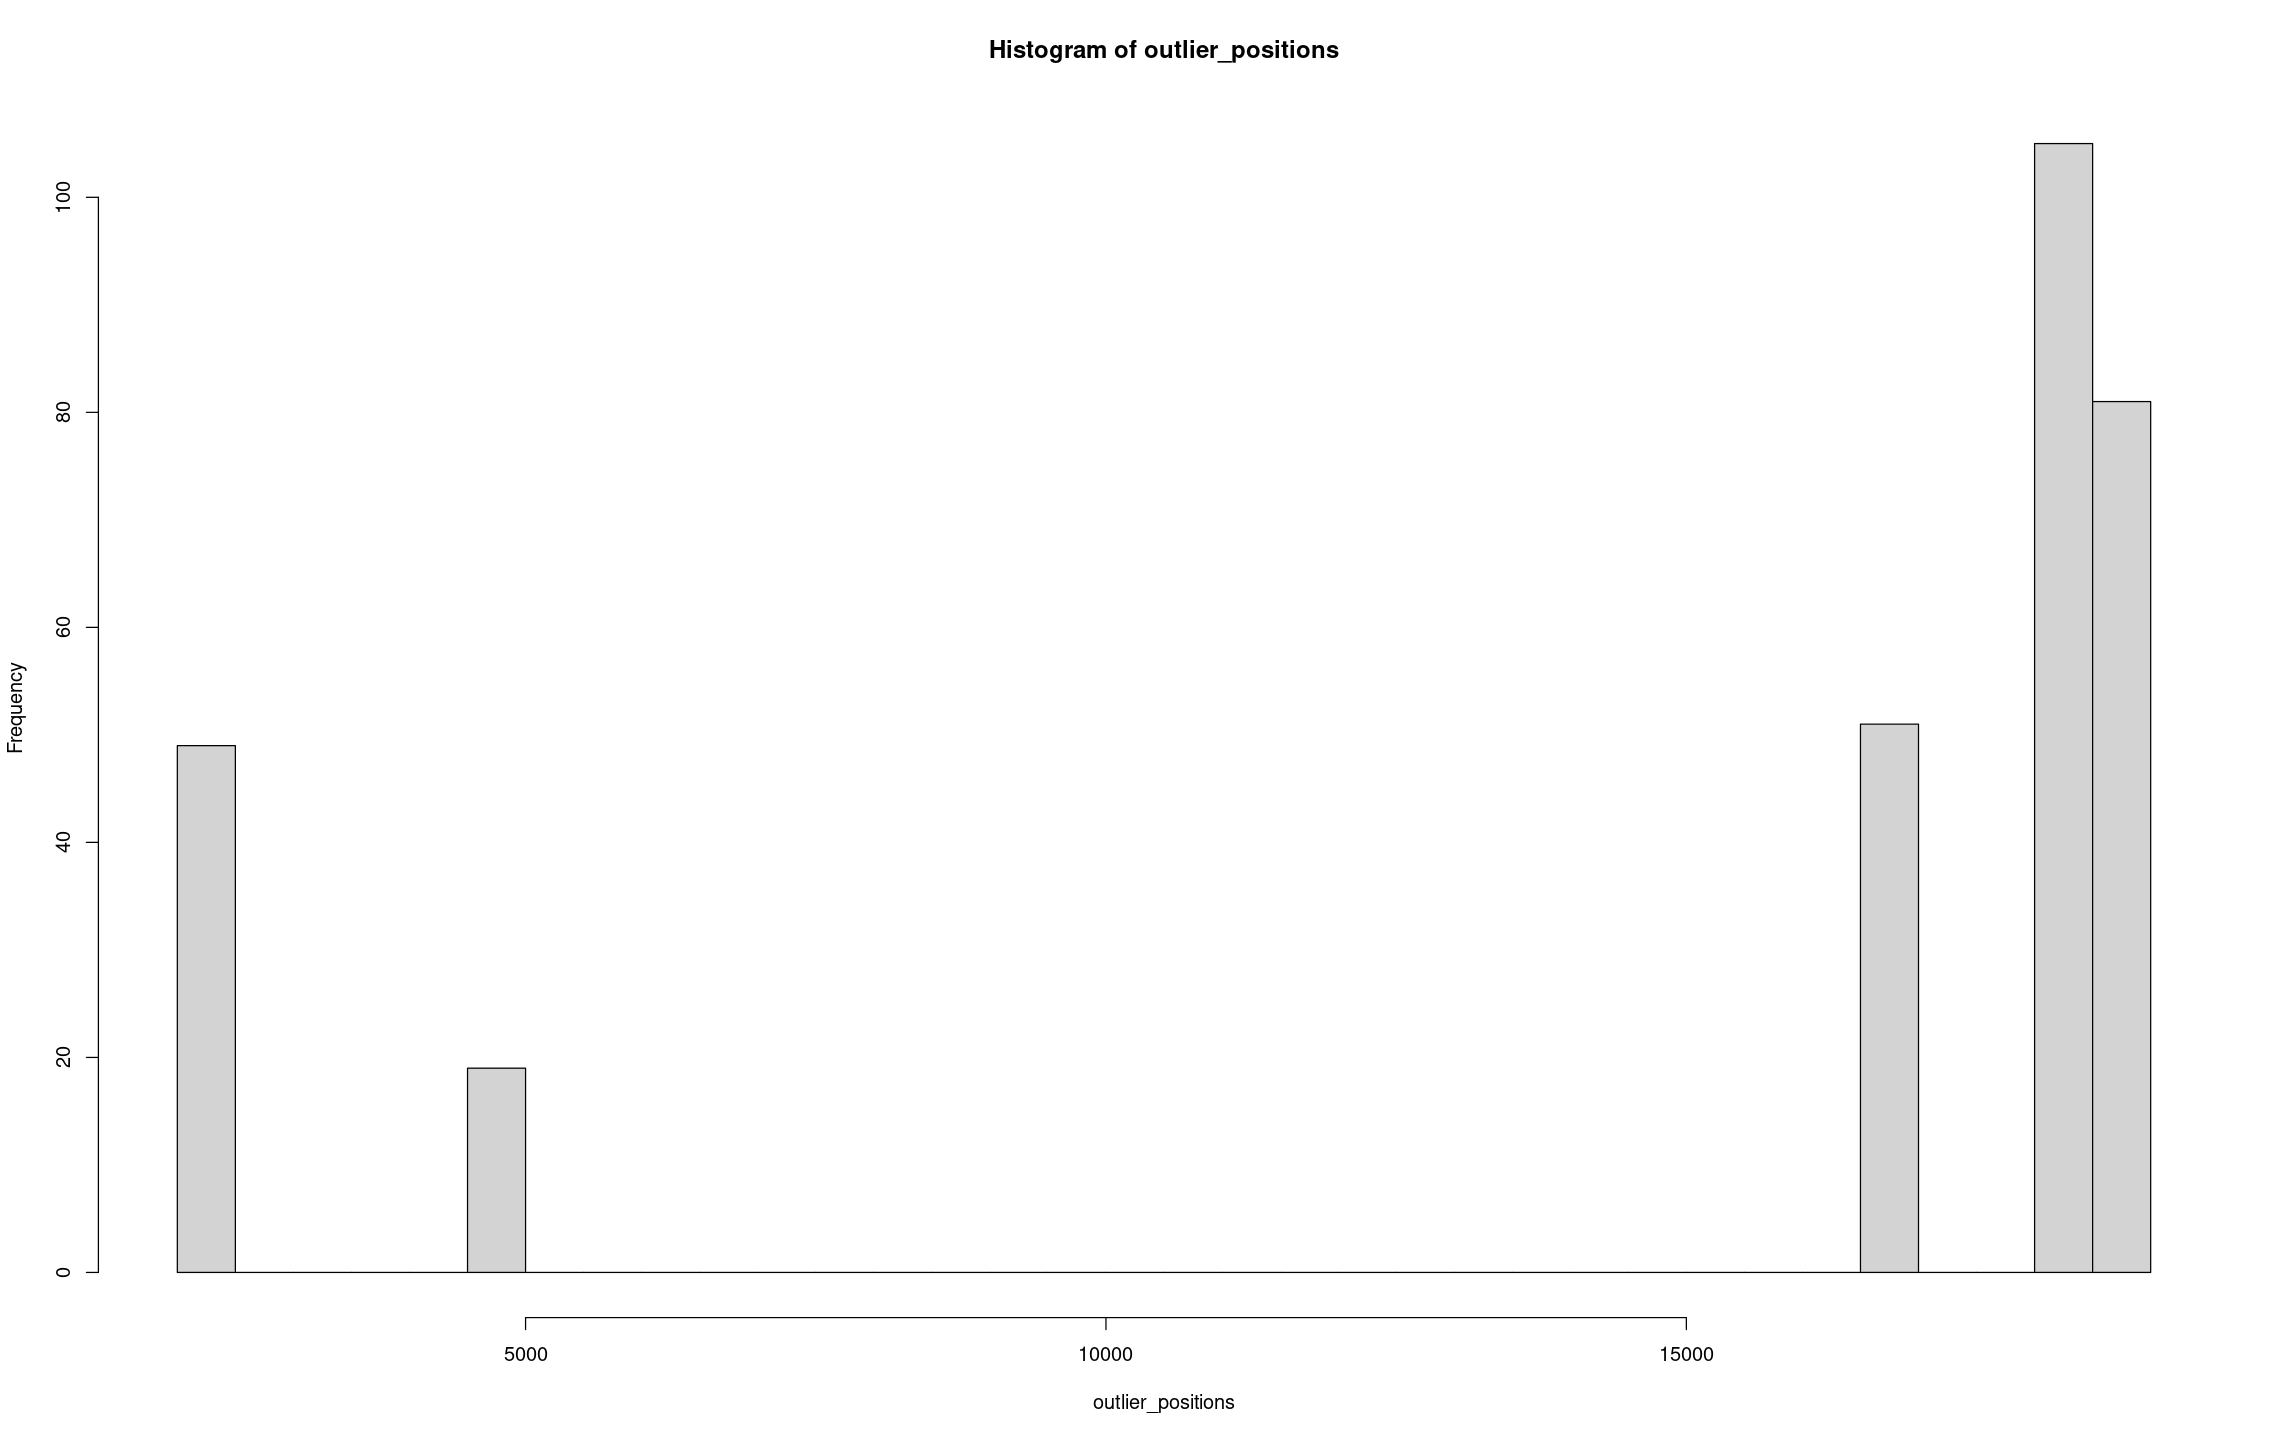

In [39]:
options(repr.plot.width=19, repr.plot.height=12)

hist(outlier_positions, nclass = 50)

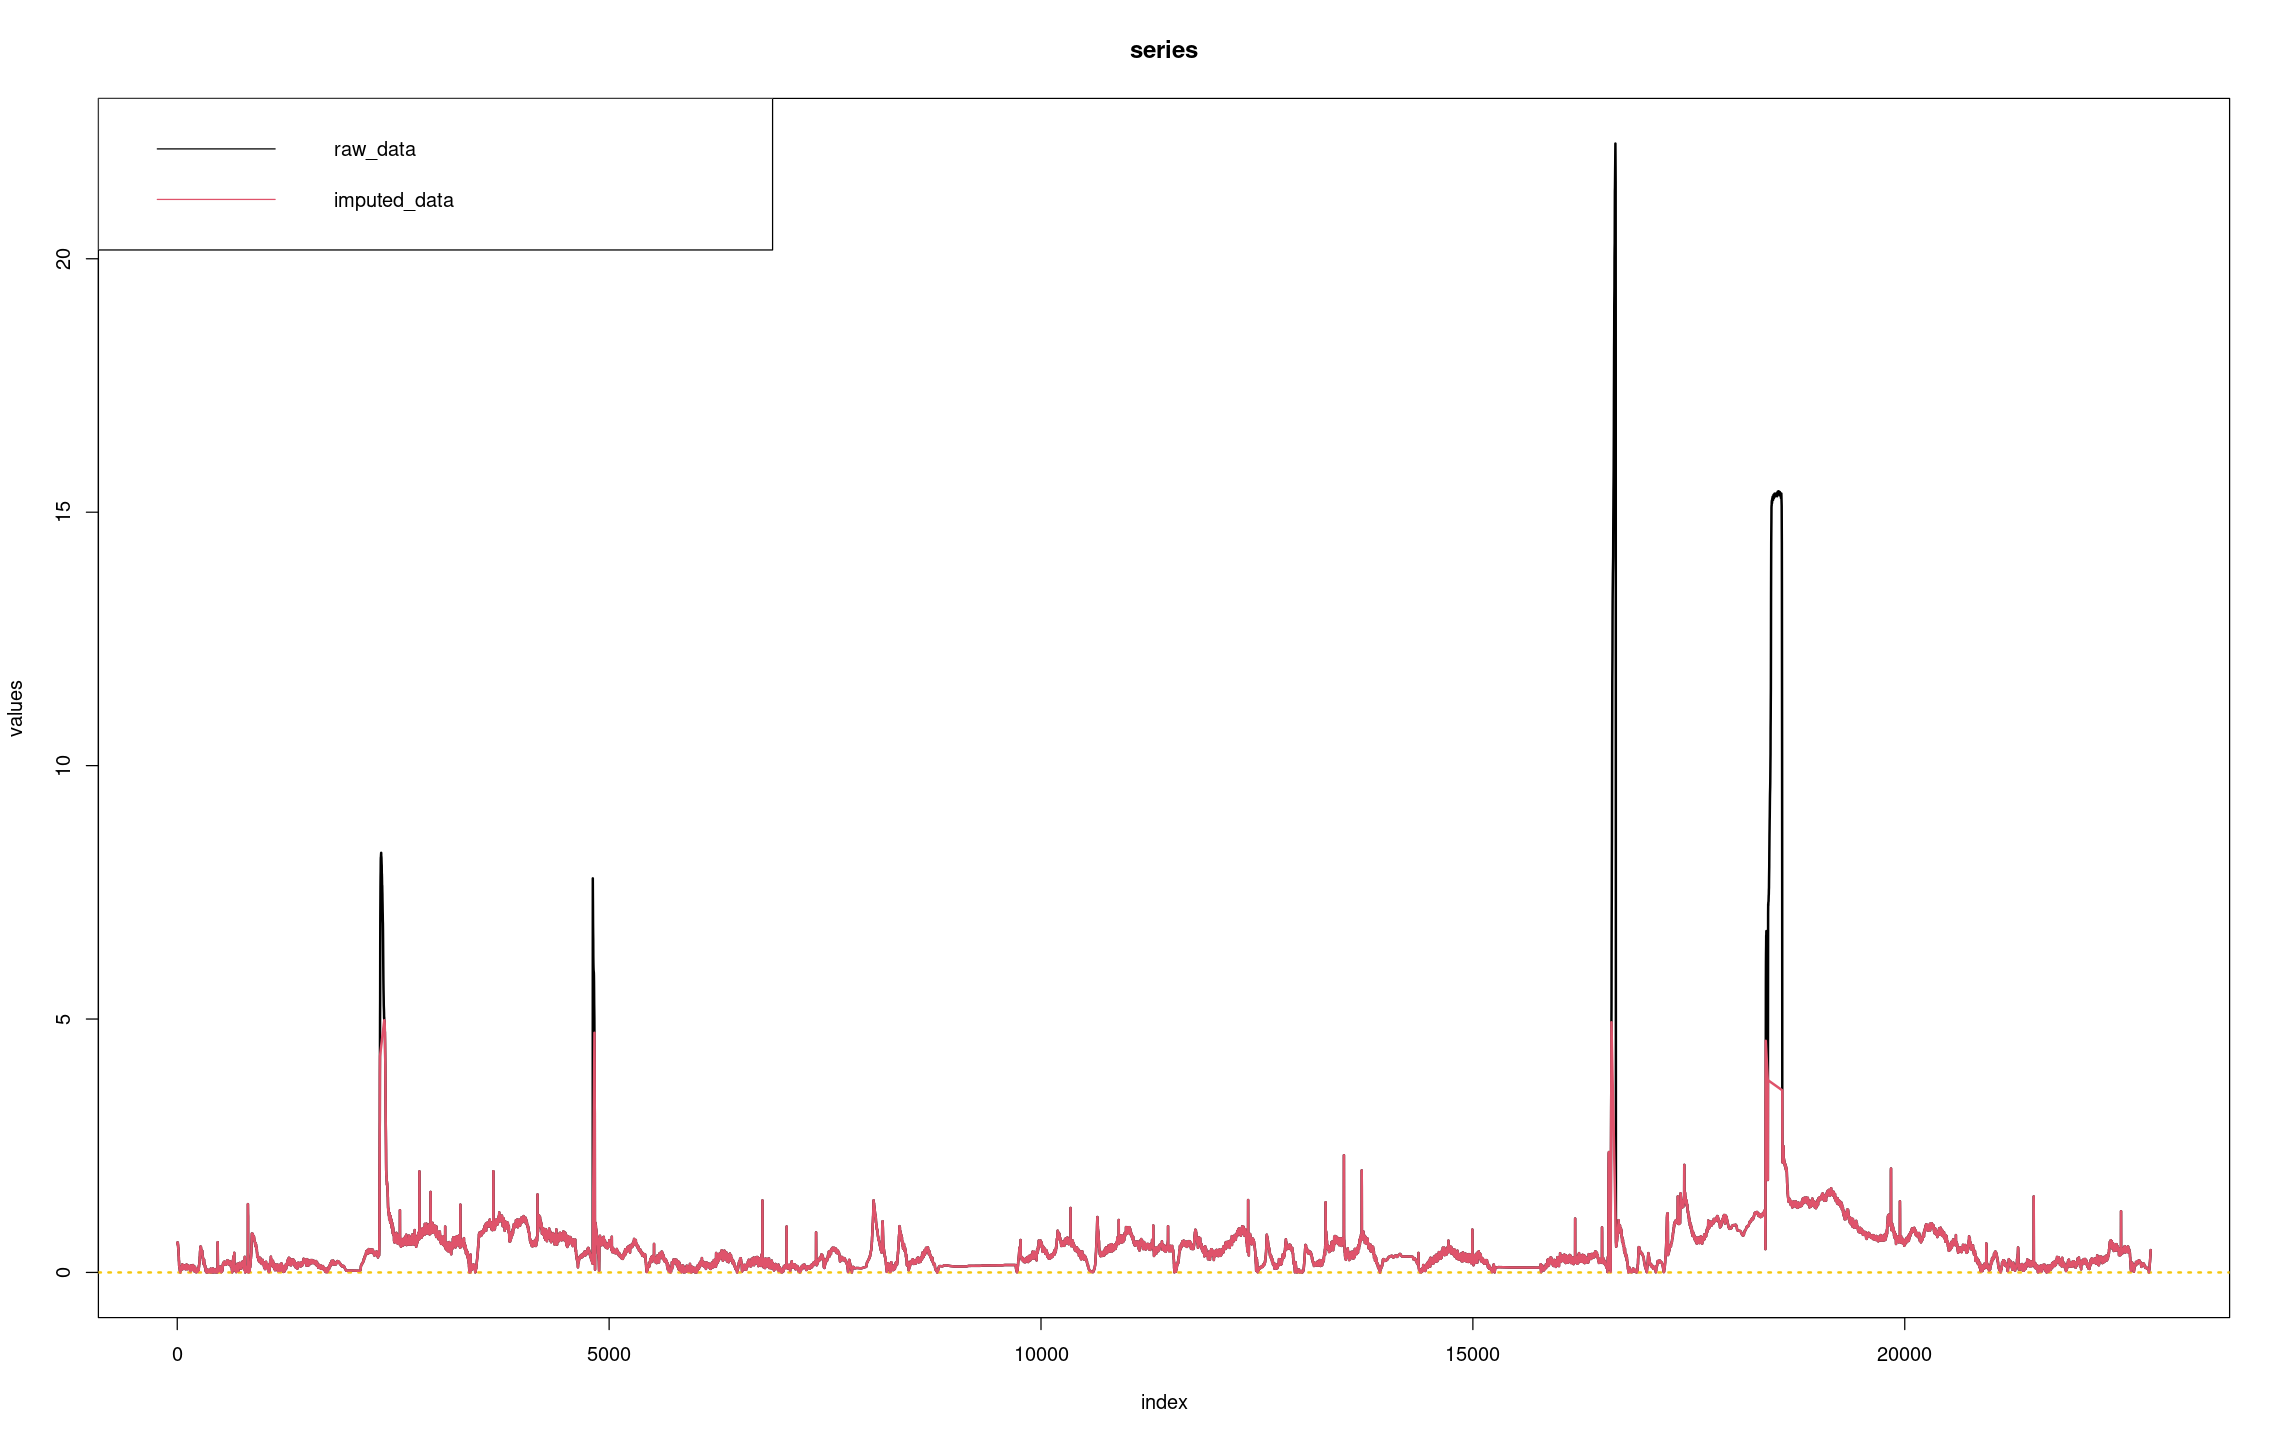

In [40]:
options(repr.plot.width=19, repr.plot.height=12)

plot(x_raw_object$raw_data, 
     type = "l", 
     lwd = 2, 
     ylab = "values", 
     xlab = "index",
    main = "series")
abline(h = 0, lty = "dotted", col = 7, lwd = 2)
lines(x_raw_object$imputed_data, col = 2, lwd = 2)
legend("topleft", legend = c("raw_data", "imputed_data"), col = c(1, 2), lty = 1:1, cex = 1)

In [41]:
# data with imputed outliers
x_with_imputed_outliers <- x_raw_object$imputed_data 

In [42]:
# data with removed outliers
x_with_removed_outliers <- x_raw[-outlier_positions]
data_clean <- data[-outlier_positions, ]

# Data description

In [43]:
x <- x_with_imputed_outliers
#x <- x_with_removed_outliers
n <- length(x)

------------------------------------------------------------------------------ 
x (numeric)

           length                n              NAs           unique'
           22'847           22'847                0           22'581
                            100.0%             0.0%                 
                                                                    
              .05              .10              .25           median
  0.0481907140464  0.0872328415513  0.1457234174015  0.3255223631860
                                                                    
            range               sd            vcoef              mad
  4.9767084120450  0.5421689620294  1.1428336973211  0.3094048471886
                                                                    
               0s             mean            meanCI
                0  0.4744075741731   0.4673769940670
             0.0%                    0.4814381542791
                                                    
    

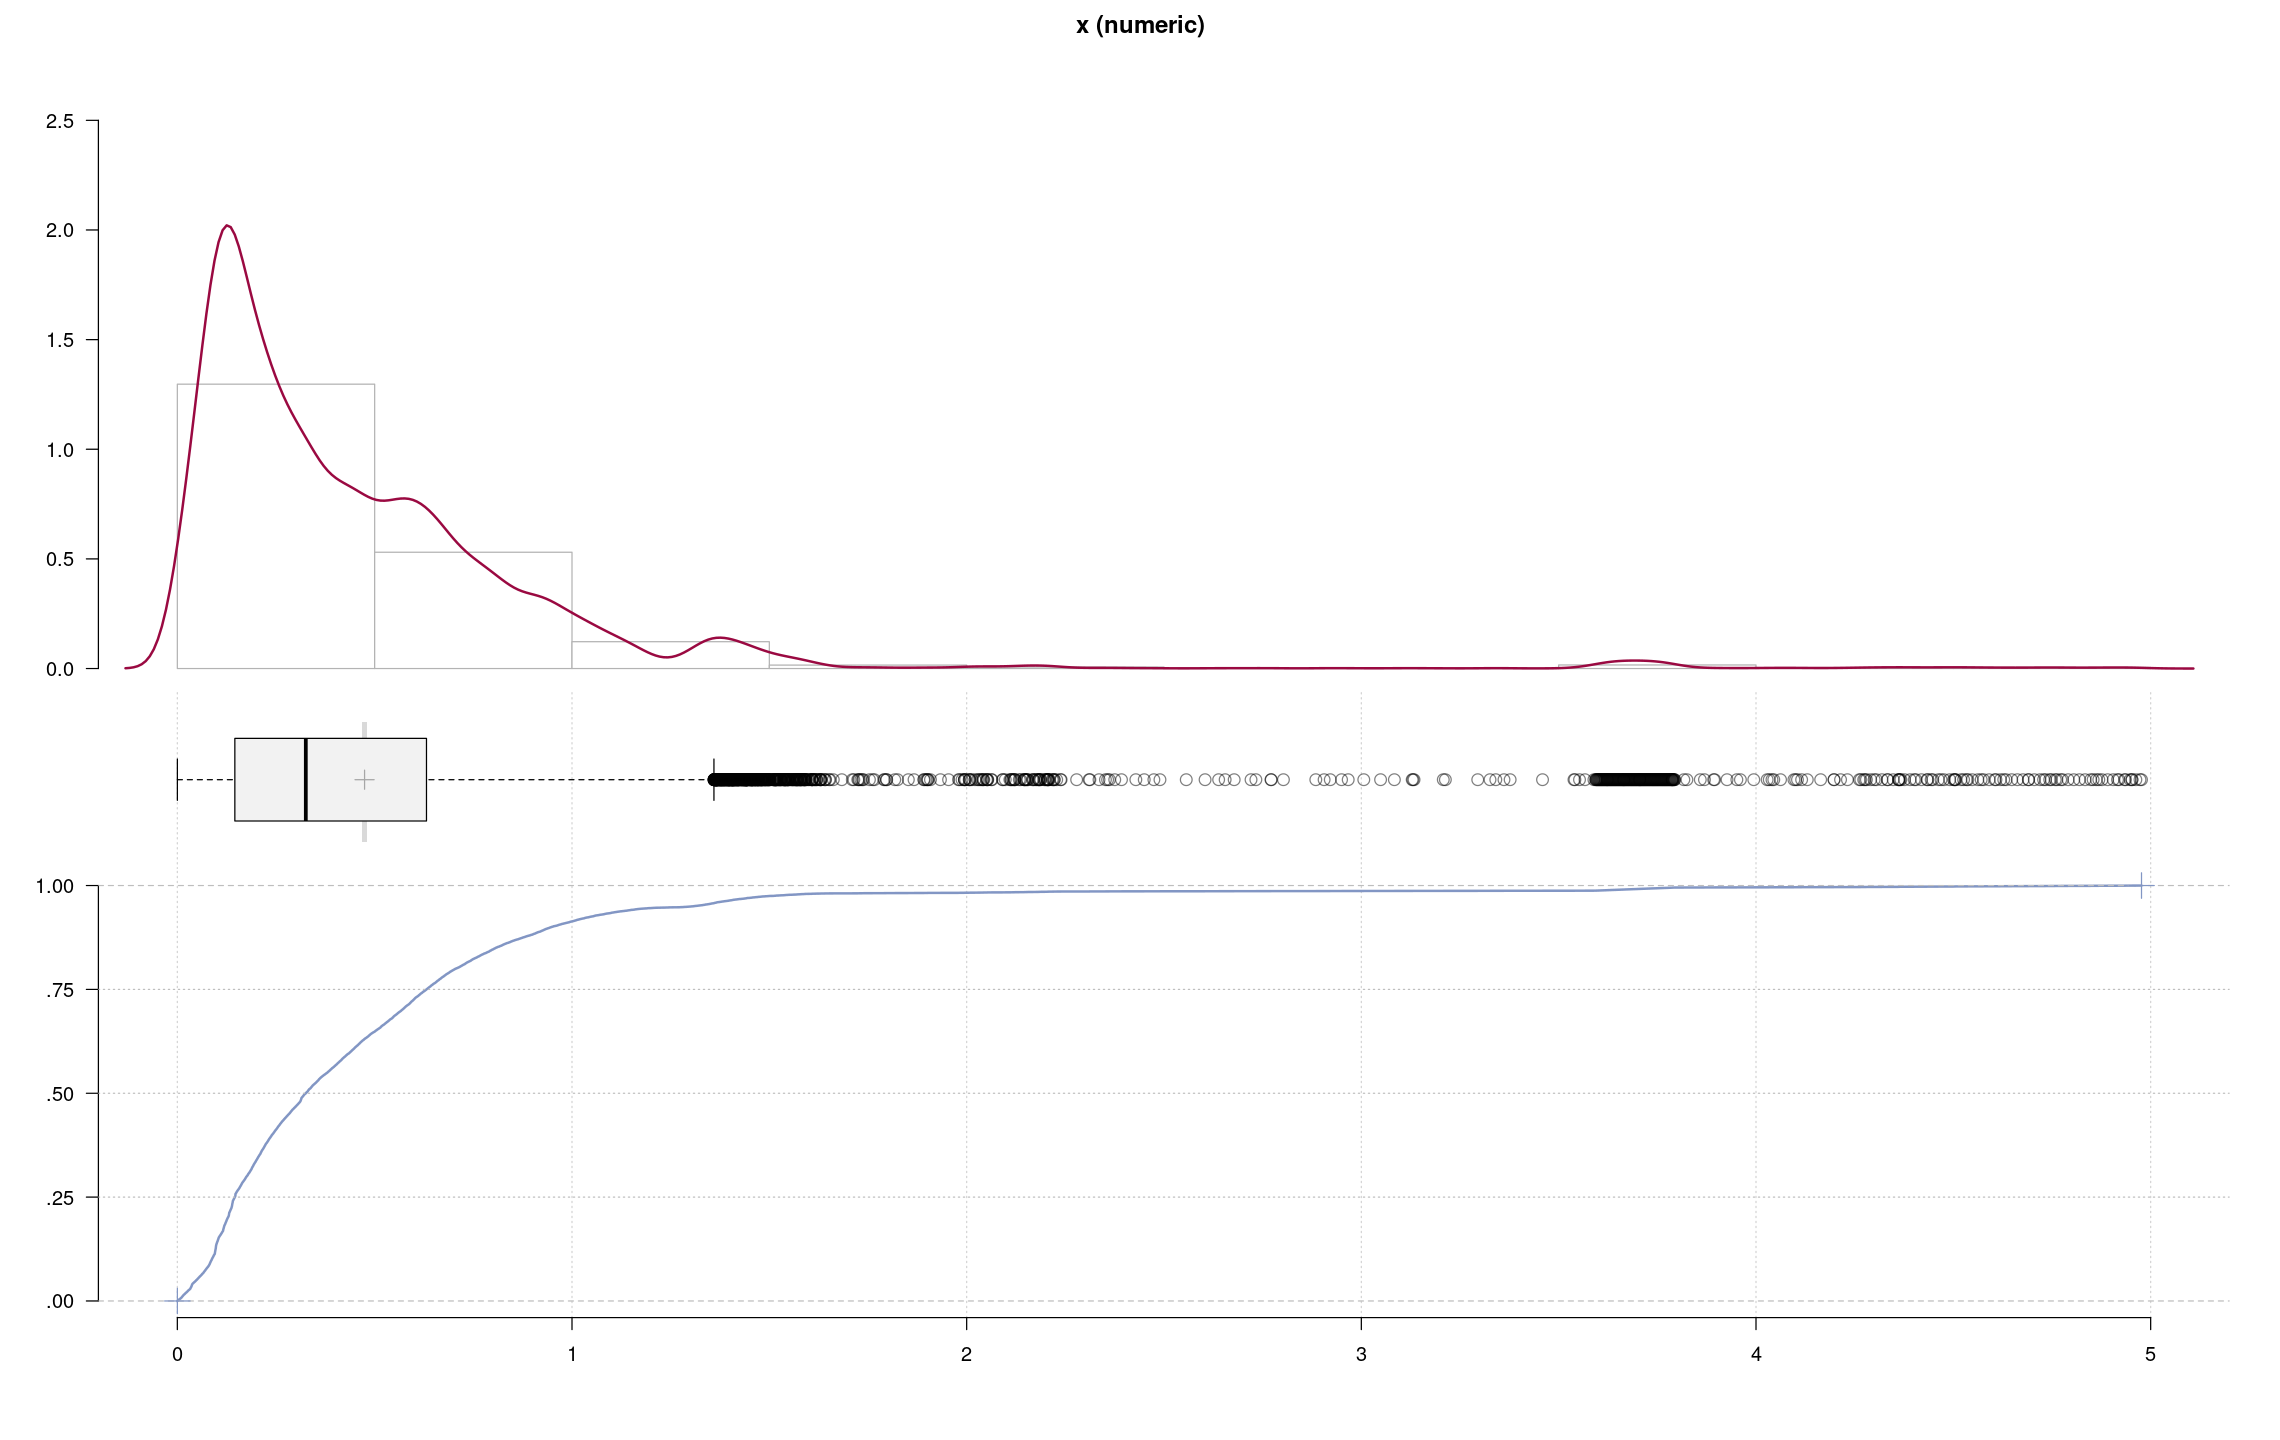

In [44]:
options(repr.plot.width=19, repr.plot.height=12)

Desc(x)

------------------------------------------------------------------------------ 
y (numeric)

        length             n           NAs        unique            0s'
         3'000         3'000             0           = n             0
                      100.0%          0.0%                        0.0%
                                                                      
           .05           .10           .25        median           .75
  0.8765672803  0.8991105735  0.9525904506  1.1000387073  1.4219199121
                                                                      
         range            sd         vcoef           mad           IQR
  4.1206932068  0.8967671469  0.6188045266  0.2917863631  0.4693294615
                                                                      
          mean        meanCI
  1.4491929329  1.4170901661
                1.4812956997
                            
           .90           .95
  2.9706681380  3.7470975355
                      

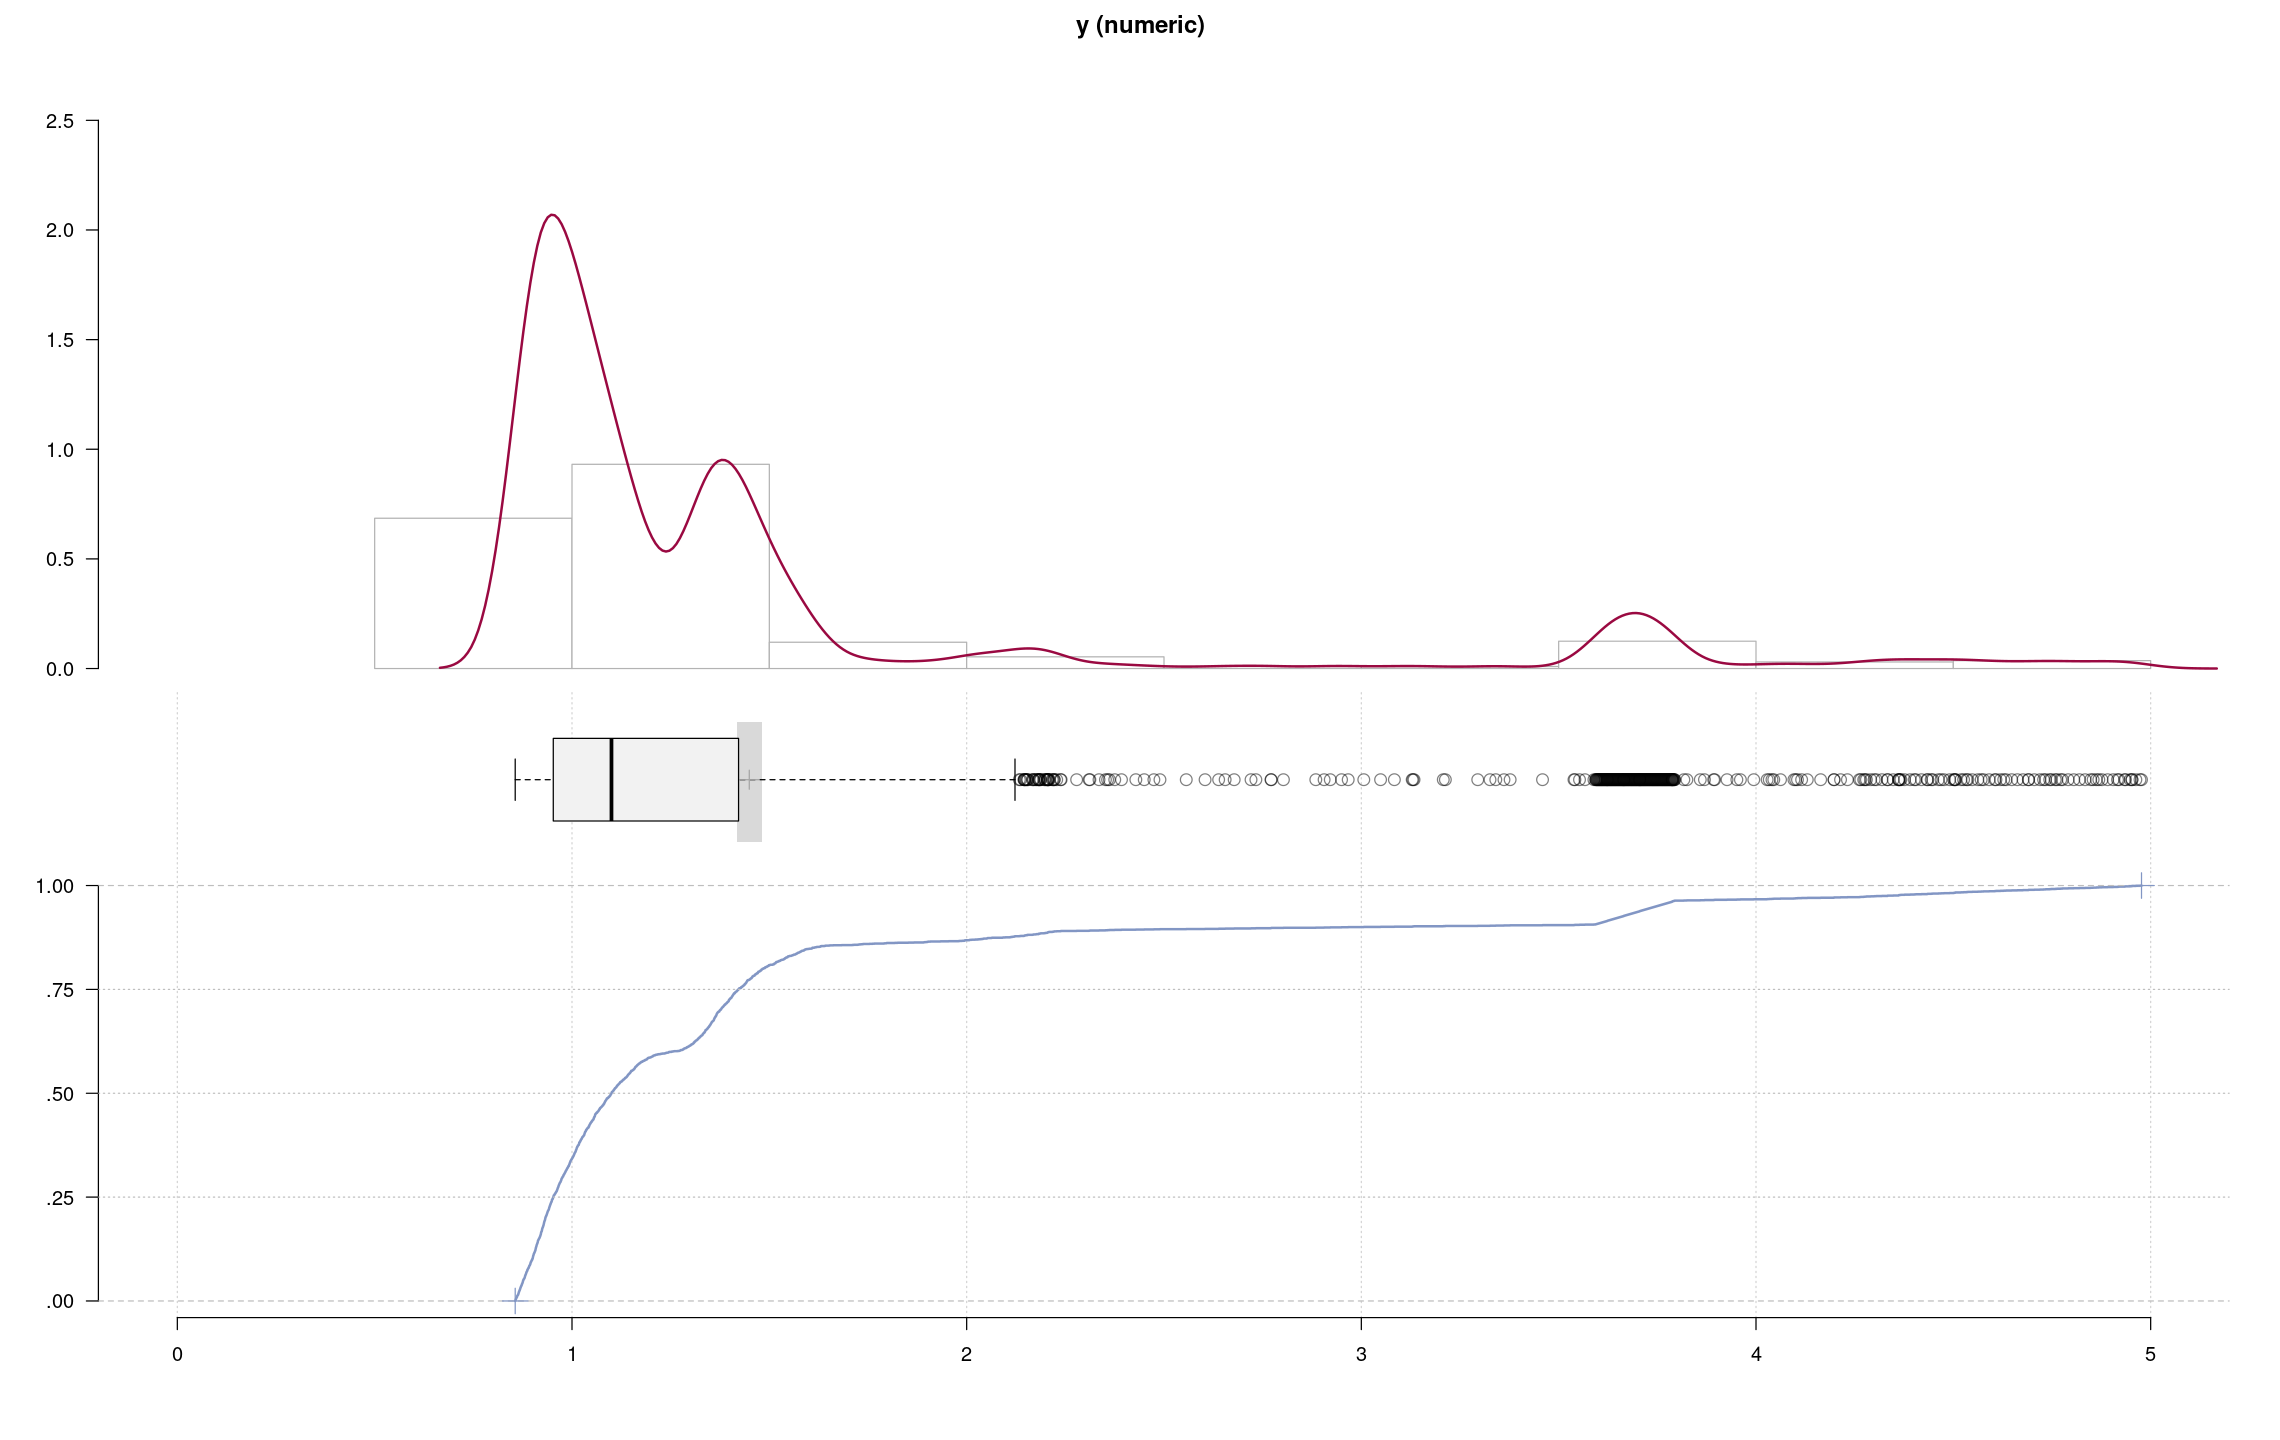

In [45]:
options(repr.plot.width=19, repr.plot.height=12)

nlargest <- 3000
y <- extract_nlargest_sample(x, n = nlargest)
Desc(y)

# EVA: Stationary case

## Estimation

In [71]:
gev_mixture_model_object <- fit_stationary_gev_mixture_model(x = x,
                                                             nlargest = Inf,
                                                             block_sizes = NULL,
                                                             minimum_nblocks = 50,
                                                             threshold = NULL,
                                                             confidence_level = 0.95,
                                                             use_extremal_index = TRUE,
                                                             use_uniform_prior = TRUE,
                                                             method = c("MLE", "GMLE", "Lmoments")[1])

In [72]:
print(names(gev_mixture_model_object))

 [1] "threshold"                            
 [2] "candidate_block_sizes"                
 [3] "equivalent_block_sizes"               
 [4] "unequivalent_block_sizes"             
 [5] "selected_block_sizes"                 
 [6] "unselected_block_sizes"               
 [7] "failed_block_sizes"                   
 [8] "use_uniform_prior"                    
 [9] "weights"                              
[10] "frequencies"                          
[11] "use_extremal_index"                   
[12] "extremal_indexes"                     
[13] "negative_log_likelihoods"             
[14] "information_criteria"                 
[15] "unnormalized_gev_parameters_object"   
[16] "normalized_gev_parameters_object"     
[17] "full_normalized_gev_parameters_object"
[18] "partial_data"                         
[19] "all_data"                             
[20] "selected_model_per_obs"               
[21] "selected_gev_models"                  
[22] "several_residuals"                    
[23] "seve

In [73]:
print(gev_mixture_model_object$full_normalized_gev_parameters_object)

        loc_star   scale_star   shape_star
1   0.2280053328 0.2040100892 0.4532449296
2   1.2724042187 0.6740549506 0.4521932916
3   1.4542056557 0.7548828086 0.4517818357
4   1.2654797486 0.6711838379 0.4541023834
5   1.4276323480 0.7429026144 0.4526740091
6   1.1542334291 0.6202302997 0.4544613655
26  0.8511830556 0.4772295850 0.4406262800
39  0.6981146676 0.4118311087 0.4325128923
57  0.7671945409 0.4453851929 0.4338663098
78  0.7863286888 0.4526172653 0.4098556862
90  0.8686241247 0.4818004083 0.3964468046
93  1.0097072102 0.5421495045 0.3990846322
101 0.9287193495 0.5069088662 0.3924130106
129 0.5875818793 0.3829499684 0.4137860778
154 0.5654070117 0.3876248344 0.4288317463


In [74]:
print(gev_mixture_model_object$weights)

              1               2               3               4               5 
0.5763372143920 0.0073535848726 0.0309463363390 0.0009191981091 0.0143132276985 
              6              26              39              57              78 
0.0030639936969 0.0152761971461 0.1155563337127 0.0040269631445 0.0130876302197 
             90              93             101             129             154 
0.0280136566576 0.0320843911407 0.0252998336689 0.1155125623742 0.0182088768275 


In [75]:
print(which.max(gev_mixture_model_object$weights))

1 
1 


In [76]:
print(which.max(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 6


In [77]:
print(which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star))

[1] 13


In [78]:
print(gev_mixture_model_object$information_criteria)

        AIC         BIC 
32279.90566 32754.06359 


## Diagnostic

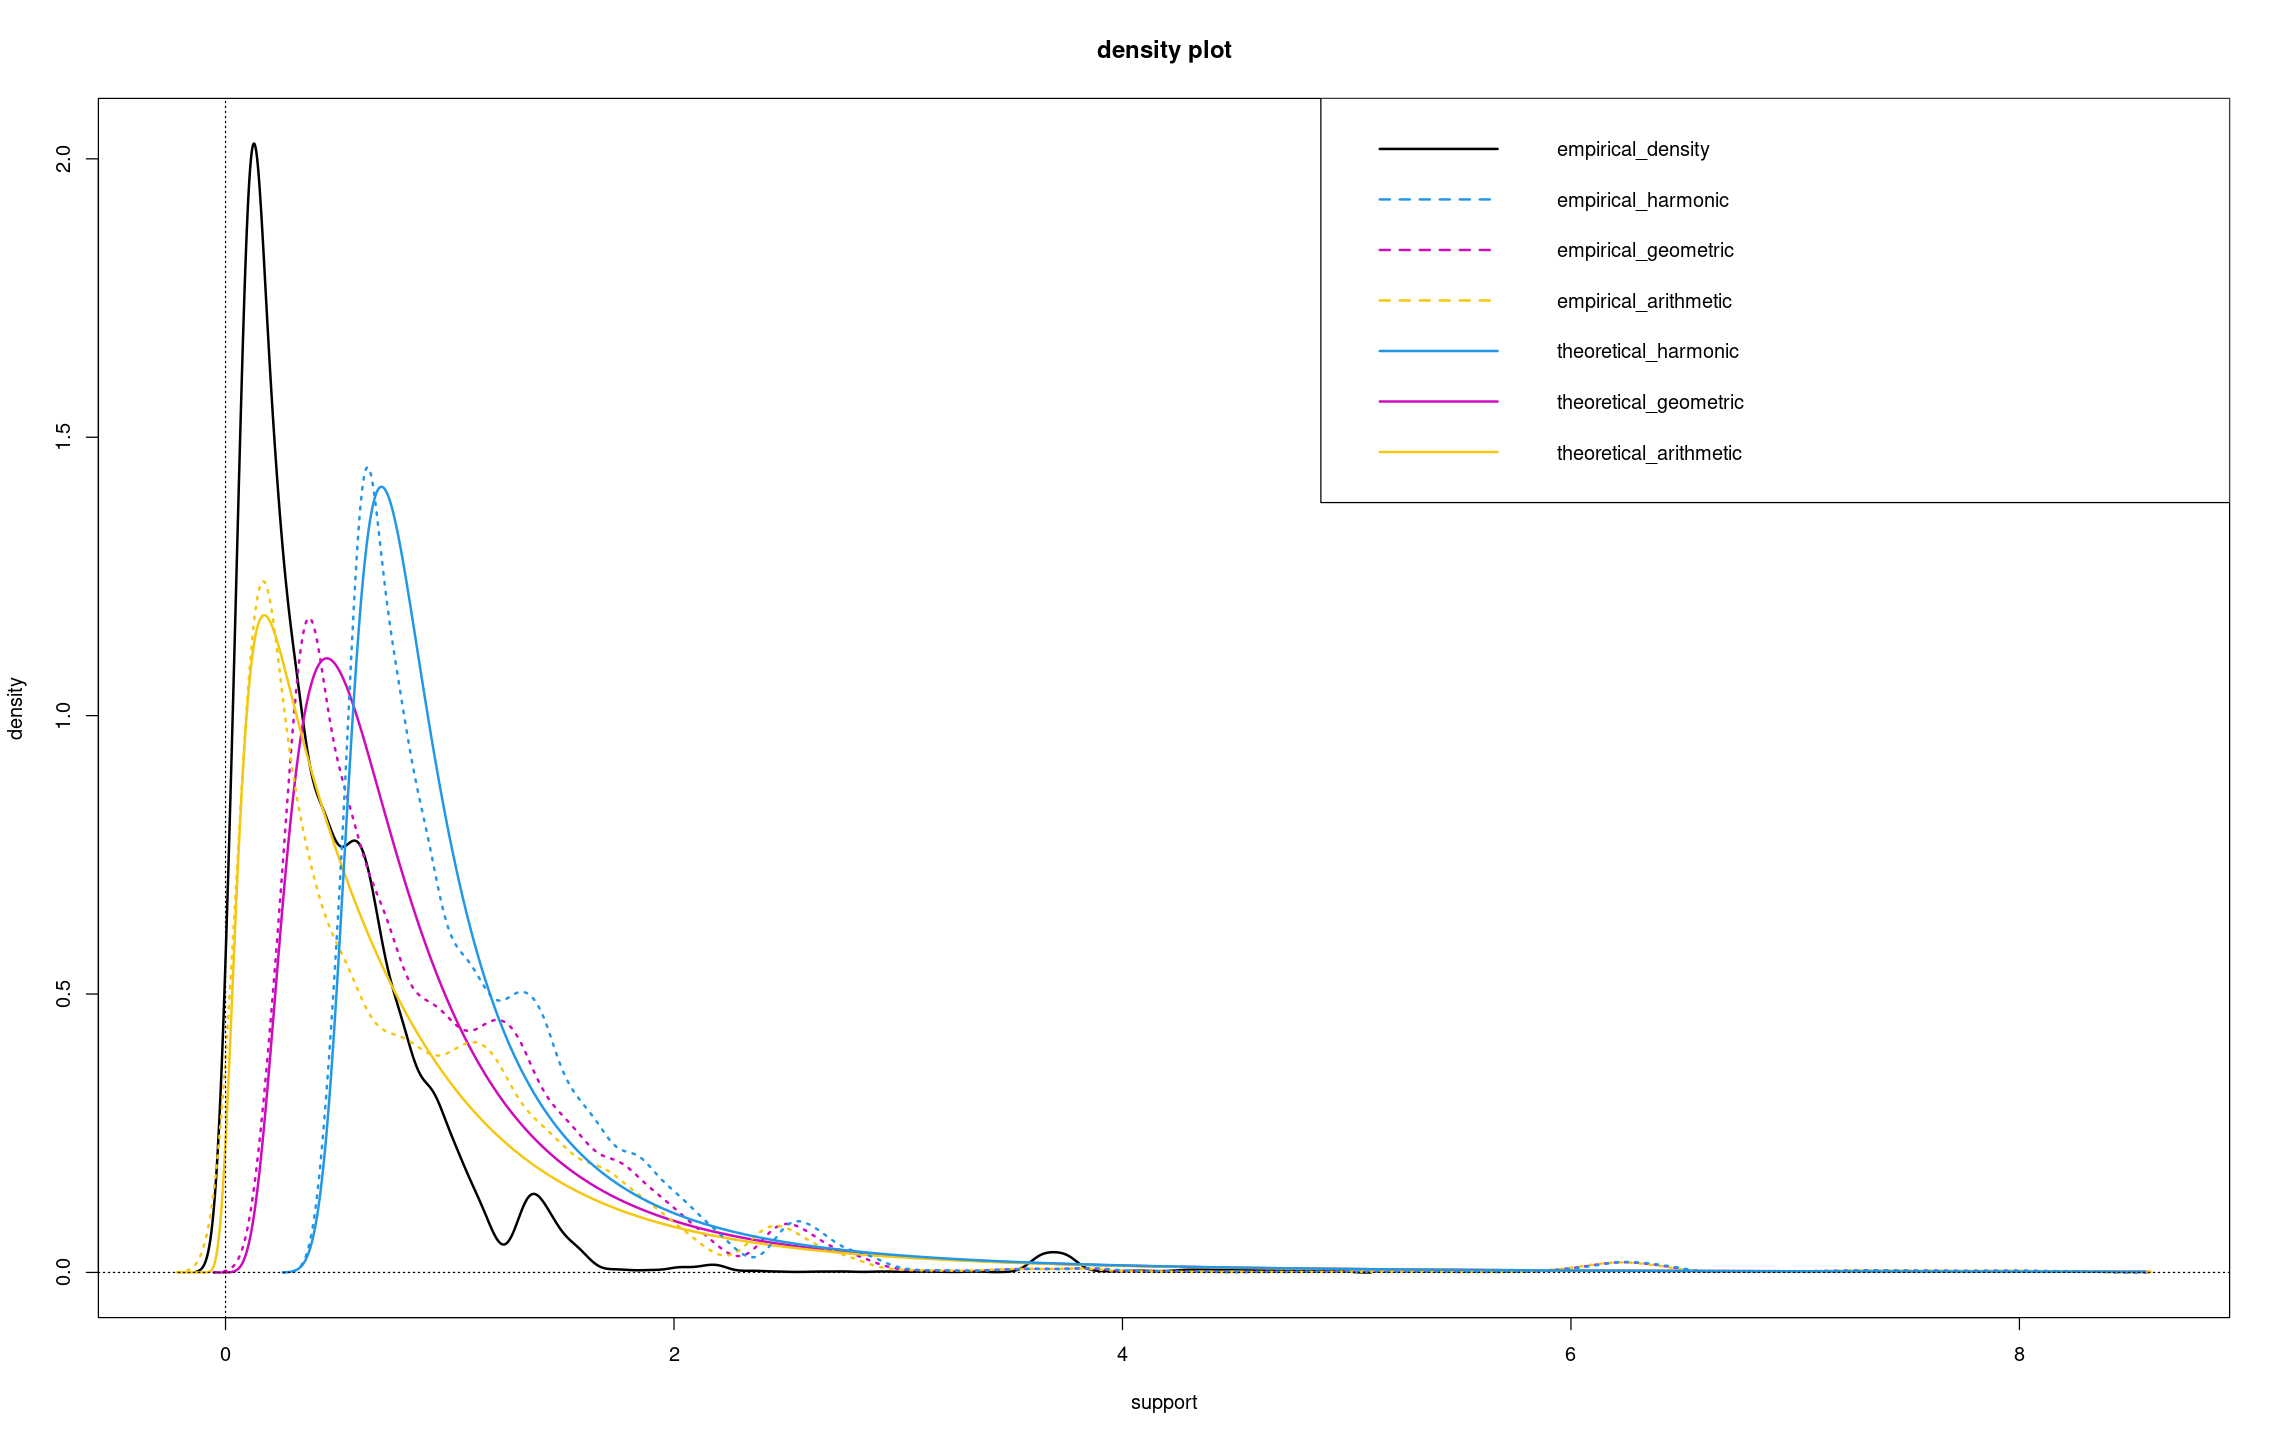

In [86]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = 0,
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

In [ ]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.max(gev_mixture_model_object$weights),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

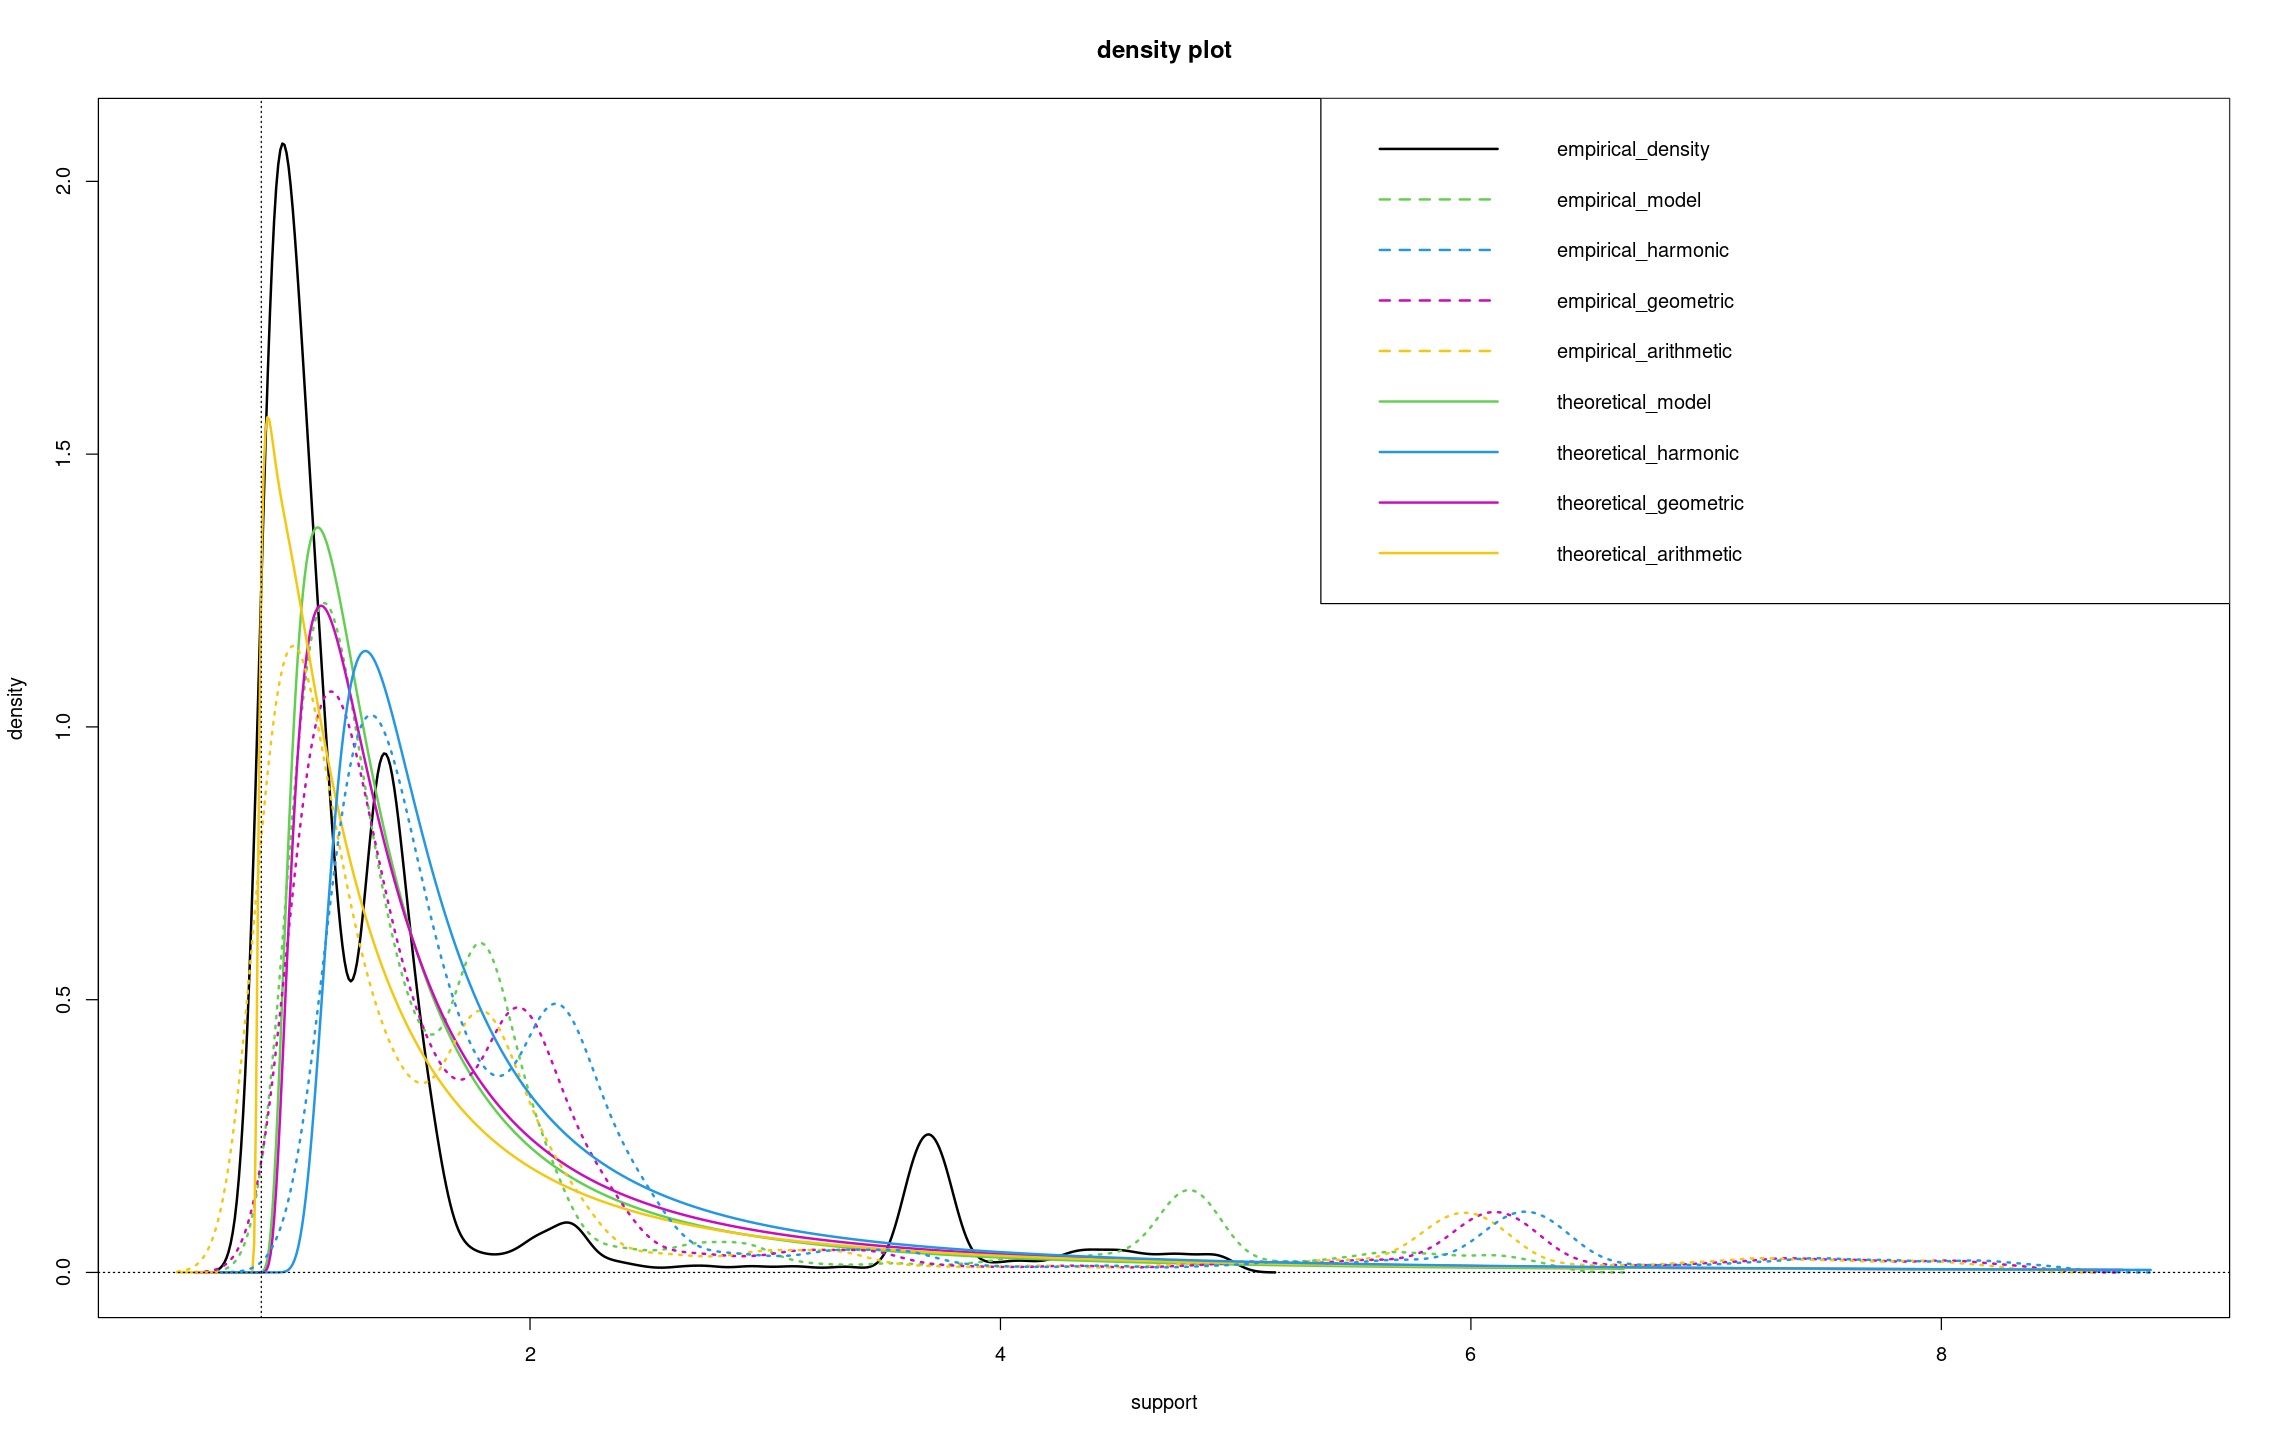

In [67]:
options(repr.plot.width=19, repr.plot.height=12)

plot_fit_stationary_gev_mixture_model(gev_mixture_model_object,
                                      model_index = which.min(gev_mixture_model_object$full_normalized_gev_parameters_object$shape_star),
                                      iterations = 10,
                                      xlab = "support",
                                      ylab = "density",
                                      main = "density plot",
                                      legend_position = "topright")

## Quantiles

In [79]:
alpha <- n^(-2)

print(alpha)

[1] 1.915762362e-09


In [80]:
true_quantile <- NULL

print(true_quantile)

NULL


In [81]:
results_geometric <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                    alpha = alpha,
                                                                    do.ci = TRUE,
                                                                    confidence_level = 0.95,
                                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                                    iterations = 100)

results_geometric

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
1,2941.286544,4022.806771,5104.326999
2,8082.324898,13062.879483,18043.434069
3,7705.556132,14507.594656,21309.633180
4,6134.240427,13444.077751,20753.915076
5,5728.322040,14529.019509,23329.716977
6,4156.063219,12509.763087,20863.462956
26,-2607.641799,7512.871271,17633.384340
39,-3464.553393,5604.629367,14673.812126
57,-5837.088080,6218.047336,18273.182752


In [82]:
results_arithmetic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[2],
                                                                     iterations = 100)

results_arithmetic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
1,2941.286544,4022.806771,5104.326999
2,8082.324898,13062.879483,18043.434069
3,7705.556132,14507.594656,21309.633180
4,6134.240427,13444.077751,20753.915076
5,5728.322040,14529.019509,23329.716977
6,4156.063219,12509.763087,20863.462956
26,-2607.641799,7512.871271,17633.384340
39,-3464.553393,5604.629367,14673.812126
57,-5837.088080,6218.047336,18273.182752


In [83]:
results_harmonic <- estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                                     alpha = alpha,
                                                                     do.ci = TRUE,
                                                                     confidence_level = 0.95,
                                                                     kind = c("geometric", "arithmetic", "harmonic")[3],
                                                                     iterations = 100)

results_harmonic

,lower_bound,estimate,upper_bound
,<dbl>,<dbl>,<dbl>
1,2941.286544,4022.806771,5104.326999
2,8082.324898,13062.879483,18043.434069
3,7705.556132,14507.594656,21309.633180
4,6134.240427,13444.077751,20753.915076
5,5728.322040,14529.019509,23329.716977
6,4156.063219,12509.763087,20863.462956
26,-2607.641799,7512.871271,17633.384340
39,-3464.553393,5604.629367,14673.812126
57,-5837.088080,6218.047336,18273.182752


In [84]:
options(repr.plot.width=23, repr.plot.height=6)

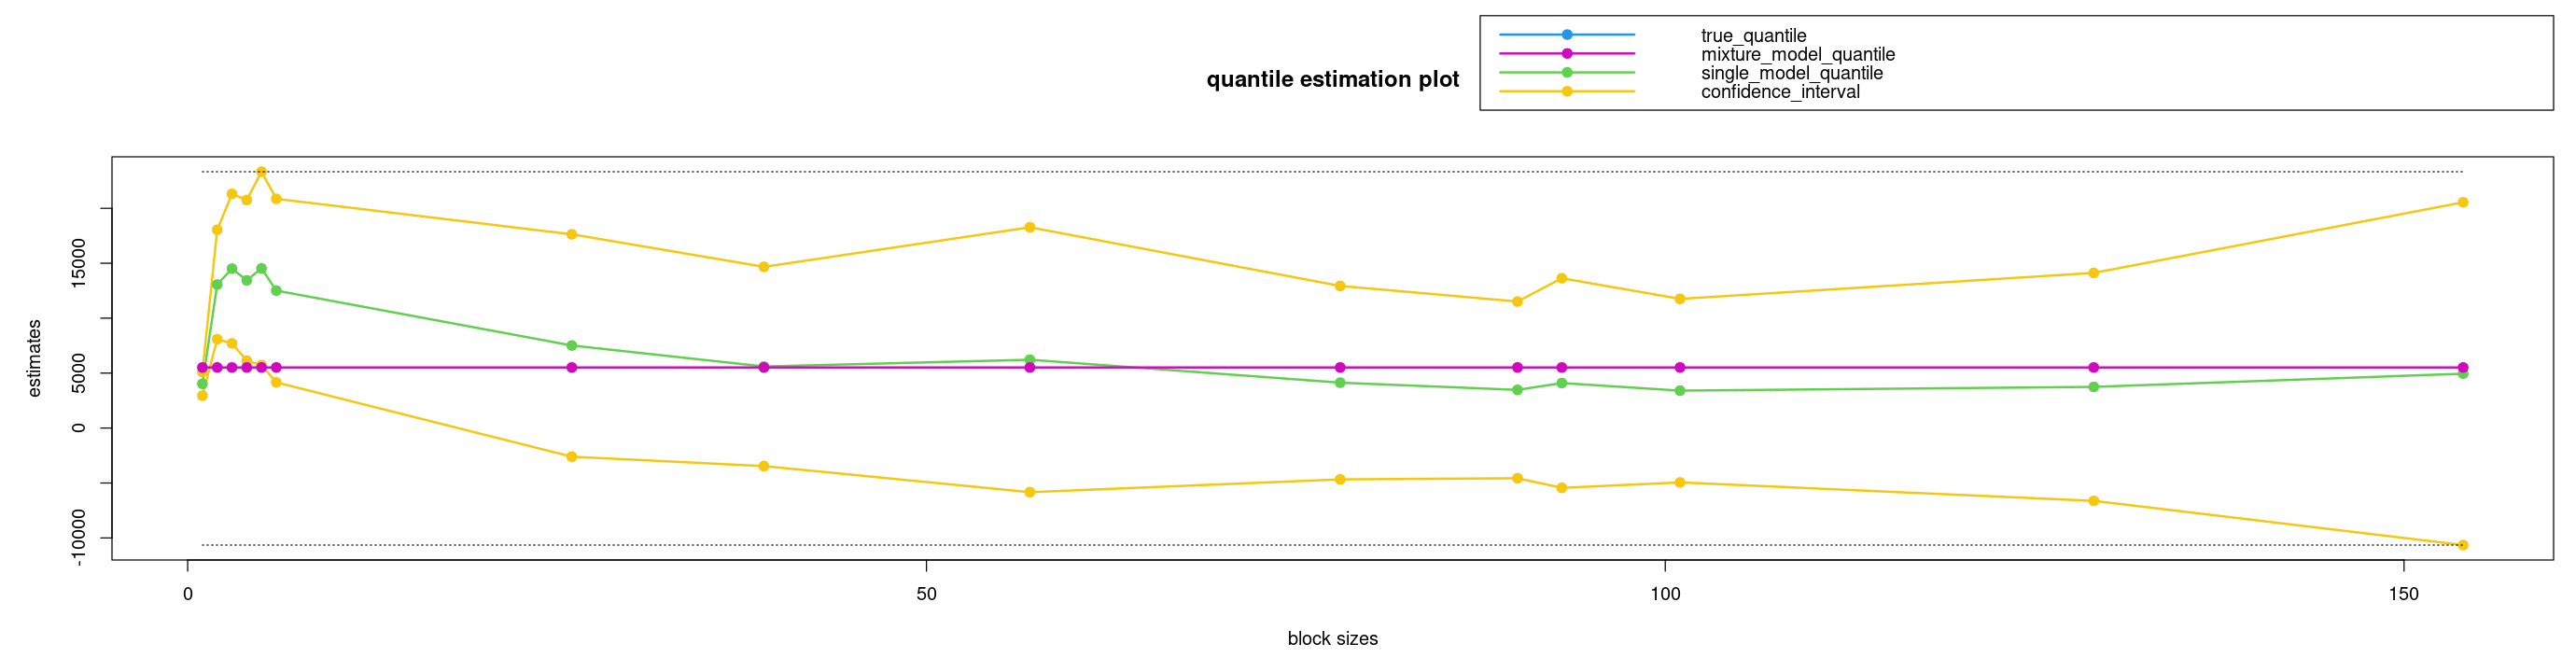

In [85]:
options(repr.plot.width=23, repr.plot.height=6)

plot_estimate_stationary_gev_mixture_model_quantile(gev_mixture_model_object,
                                                    alpha = alpha,
                                                    true_quantile = NULL,
                                                    do.ci = TRUE,
                                                    confidence_level = 0.95,
                                                    kind = c("geometric", "arithmetic", "harmonic")[1],
                                                    iterations = 100,
                                                    xlab = "block sizes",
                                                    ylab = "estimates",
                                                    main = "quantile estimation plot",
                                                    legend_position = "topright")